In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sim as vrep
import time
import cv2
import numpy as np

vrep.simxFinish(-1)

clientID = vrep.simxStart('127.0.0.1', 19999, True, True, 5000, 5)
errcode,Handle=vrep.simxGetObjectHandle(clientID,'Pioneer_p3dx',vrep.simx_opmode_oneshot_wait)

if clientID!=-1:
    # Handler for the camera
    res, v1 = vrep.simxGetObjectHandle(clientID, 'Vision_sensor', vrep.simx_opmode_oneshot_wait)
    print ('Getting first image')
    err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_streaming)
    
    
    # Take p pictures
    p = 20
    i = 0
    
    resP, VP = vrep.simxGetObjectHandle(clientID, 'Plane', vrep.simx_opmode_oneshot_wait)
    pics=numpy.empty(p+1,dtype=numpy.ndarray)
    orientation=numpy.empty(p+1,dtype=list)
    
    while i <= p:     
        err, resolution, image = vrep.simxGetVisionSensorImage(clientID, v1, 0, vrep.simx_opmode_buffer)
        if err == vrep.simx_return_ok:
            print ("image %d OK!!!"%i)
            img = np.array(image,dtype=np.uint8)
            img.resize([resolution[1],resolution[0],3])
            
            #storing image in an array
            pics[i]=img
            
            #getting orientaion
            returnCodeOrientation,eulerAngles=vrep.simxGetObjectOrientation(clientID, Handle,-1,vrep.simx_opmode_streaming)
            
            #saving the orientation in an array
            orientation[i]=eulerAngles[2]
            
            
            # Show the images using Opencv (uncomment if you want to try it)
#            cv2.imshow('image',img)
#            if cv2.waitKey(1) & 0xFF == ord('q'):
#                break
            i+=1
        elif err == vrep.simx_return_novalue_flag:
            print ("no image yet")
            pass
        else:
          print (err)
        time.sleep(1)
else:
  print ("Failed to connect to remote API Server")
  vrep.simxFinish(clientID)

Getting first image
image 0 OK!!!
image 1 OK!!!
image 2 OK!!!
image 3 OK!!!
image 4 OK!!!
image 5 OK!!!
image 6 OK!!!
image 7 OK!!!
image 8 OK!!!
image 9 OK!!!
image 10 OK!!!
image 11 OK!!!
image 12 OK!!!
image 13 OK!!!
image 14 OK!!!
image 15 OK!!!
image 16 OK!!!
image 17 OK!!!
image 18 OK!!!
image 19 OK!!!
image 20 OK!!!


In [6]:
print(orientation[7])

-2.3806352615356445


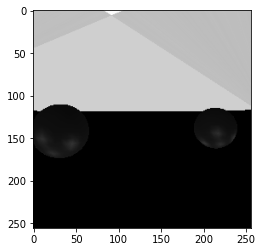

In [8]:
#changing each pic in the array to gray scale
count=0
picsgray=numpy.empty(p+1,dtype=numpy.ndarray)
for x in pics:
    gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
    picsgray[count]=gray
    imshow(gray, cmap='gray')
    count+=1

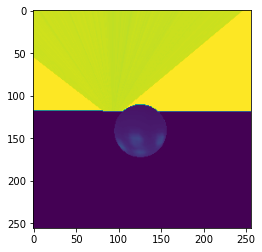

In [9]:
imshow(picsgray[10])

In [10]:
testray=numpy.empty(1,dtype=numpy.ndarray)
gray = cv2.medianBlur(picsgray[0],5)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, gray.shape[0] / 8, param1=30,param2=15,minRadius=10,maxRadius=0)
rmax=0
count=0
for x in circles[0, :]:
        r=x[2]
        if r>rmax:
            testray[count]=x
            rmax=r

for x in testray:
    print(x[2])
        

53.8


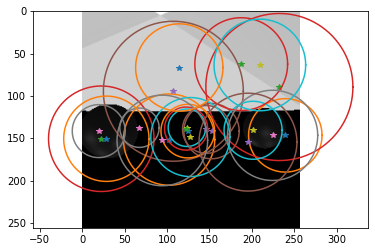

In [11]:
circlesray=numpy.empty(p+1,dtype=numpy.ndarray)
blurpics=numpy.empty(p+1,dtype=numpy.ndarray)
count=0
for x in picsgray:
    gray = cv2.medianBlur(x,5)
    blurpics[count]=gray
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, gray.shape[0] / 8, param1=30,param2=15,minRadius=10,maxRadius=0)
    rmax=0
    for x in circles[0, :]:
        r=x[2]
        #only keeping the circle with the biggest radius
        if r>rmax:
            circlesray[count]=x
            rmax=r
    count=count+1
    

radiusray=numpy.empty(p+1,dtype=float)
centerray=numpy.empty(p+1,dtype=numpy.ndarray)    
count=0    
if circles is not None:
    for x in circlesray:
        center = (x[0], x[1])  # In pixels
        radius = x[2]  # In pixels
        imshow(blurpics[count], cmap='gray')
        radiusray[count]=radius
        centerray[count]=center
        count+=1
        # plot circle
        s = linspace(0,2*pi,100)
        cx = cos(s)*radius + center [0]
        cy = sin(s)*radius + center [1]
        # Plot center
        plot(center[0], center[1], '*')
        plot(cx,cy)

In [12]:
print(circlesray)

[array([102.5, 151.5,  53.8], dtype=float32)
 array([ 22.5, 150.5,  62.2], dtype=float32)
 array([152.5, 141.5,  32.6], dtype=float32)
 array([ 19.5, 141.5,  31.2], dtype=float32)
 array([123.5, 137.5,  22.1], dtype=float32)
 array([239.5, 146.5,  43.3], dtype=float32)
 array([232.5,  89.5,  86.7], dtype=float32)
 array([107.5,  94.5,  82.5], dtype=float32)
 array([ 67.5, 137.5,  23.2], dtype=float32)
 array([201.5, 140.5,  34.2], dtype=float32)
 array([124.5, 141.5,  31.6], dtype=float32)
 array([187.5,  62.5,  54.7], dtype=float32)
 array([146.5, 139.5,  28.2], dtype=float32)
 array([224.5, 146.5,  53.2], dtype=float32)
 array([127.5, 148.5,  46.6], dtype=float32)
 array([ 28.5, 150.5,  50.3], dtype=float32)
 array([122.5, 138.5,  25.4], dtype=float32)
 array([195.5, 154.5,  57.7], dtype=float32)
 array([ 94.5, 152.5,  53.4], dtype=float32)
 array([209.5,  63.5,  54. ], dtype=float32)
 array([114.5,  66.5,  51.5], dtype=float32)]


In [13]:
for x in radiusray:
    print(x)

53.79999923706055
62.20000076293945
32.599998474121094
31.200000762939453
22.100000381469727
43.29999923706055
86.69999694824219
82.5
23.200000762939453
34.20000076293945
31.600000381469727
54.70000076293945
28.200000762939453
53.20000076293945
46.599998474121094
50.29999923706055
25.399999618530273
57.70000076293945
53.400001525878906
54.0
51.5


In [14]:
u0, v0 = 132, 132
xzcord=numpy.empty(p+1,dtype=numpy.ndarray)  
count=0
for x in circlesray:
    k = int(x[2]) / (1.5 / 2)  # Pixels per meters (radius in pixels / radius in  meters)
    fov = 60  # degrees

    # number of pixels in x-axis
    npx = 264

    # maximum value in the x-axis (in meters)
    xmax = npx / (2.* k)

    # Distance to the center of the sphere (z-axis coordinate)
    zc = xmax / tan(pi/6)
    

    # Location of the sphere in the x-axis coordinate
    xc = (x[0] - u0) / k
    
    print(xc, zc)
    xzcord[count]=[xc, zc, k, x[2]]
    count+=1

-0.41745283018867924 3.235340187722997
-1.3245967741935483 2.765694031440627
0.48046875 5.358532185916214
-2.721774193548387 5.531388062881254
-0.2897727272727273 7.794228634059948
1.875 3.9877448825422994
0.876453488372093 1.9938724412711497
-0.22408536585365854 2.091134511577059
-2.1032608695652173 7.455349128231254
1.5330882352941175 5.043324410274084
-0.18145161290322578 5.531388062881254
0.7708333333333334 3.1754264805429417
0.3883928571428571 6.124036783904245
1.3089622641509433 3.235340187722997
-0.0733695652173913 3.727674564115627
-1.5525 3.4294605989863767
-0.285 6.858921197972753
0.8355263157894737 3.008298771040682
-0.5306603773584905 3.235340187722997
1.0763888888888888 3.1754264805429417
-0.25735294117647056 3.362216273516056


In [29]:
#changing xc and zc to X and Y using orientation
import math
xycord=numpy.empty(p+1,dtype=numpy.ndarray)
count=0
for x in xzcord:
    D=sqrt(x[0]**2+x[1]**2)
    Y=D*sin(orientation[count])
    X=D*cos(orientation[count])
    
    xycord[count]=[X,Y,x[2],x[3],orientation[count]]
    count+=1

In [30]:
print(xzcord)

[list([-0.41745283018867924, 3.235340187722997, 70.66666666666667, 53.8])
 list([-1.3245967741935483, 2.765694031440627, 82.66666666666667, 62.2])
 list([0.48046875, 5.358532185916214, 42.666666666666664, 32.6])
 list([-2.721774193548387, 5.531388062881254, 41.333333333333336, 31.2])
 list([-0.2897727272727273, 7.794228634059948, 29.333333333333332, 22.1])
 list([1.875, 3.9877448825422994, 57.333333333333336, 43.3])
 list([0.876453488372093, 1.9938724412711497, 114.66666666666667, 86.7])
 list([-0.22408536585365854, 2.091134511577059, 109.33333333333333, 82.5])
 list([-2.1032608695652173, 7.455349128231254, 30.666666666666668, 23.2])
 list([1.5330882352941175, 5.043324410274084, 45.333333333333336, 34.2])
 list([-0.18145161290322578, 5.531388062881254, 41.333333333333336, 31.6])
 list([0.7708333333333334, 3.1754264805429417, 72.0, 54.7])
 list([0.3883928571428571, 6.124036783904245, 37.333333333333336, 28.2])
 list([1.3089622641509433, 3.235340187722997, 70.66666666666667, 53.2])
 list

In [31]:
print(xycord)

[list([3.2621607863083657, 0.0, 70.66666666666667, 53.8, 0.0])
 list([2.7833812814550734, -1.2870154357255292, 82.66666666666667, 62.2, -0.43311184644699097])
 list([3.9801267974556636, -3.6198491796484955, 42.666666666666664, 32.6, -0.7380285263061523])
 list([3.116916642771611, -5.318753548047188, 41.333333333333336, 31.2, -1.0407167673110962])
 list([1.5393110643335899, -7.646207535810891, 29.333333333333332, 22.1, -1.372134804725647])
 list([-0.5939928524042427, -4.366337909453982, 57.333333333333336, 43.3, -1.7060054540634155])
 list([-0.8391915671741501, -2.0098396809009365, 114.66666666666667, 86.7, -1.9663326740264893])
 list([-1.523019631340857, -1.4503340991815488, 109.33333333333333, 82.5, -2.3806352615356445])
 list([-6.920107811651191, -3.4810982152744447, 30.666666666666668, 23.2, -2.6755151748657227])
 list([-5.209426689259405, -0.804583254670061, 45.333333333333336, 34.2, -2.988355875015259])
 list([-5.459755486605952, 0.905675778900273, 41.333333333333336, 31.6, 2.9772

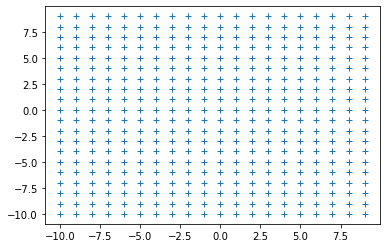

In [24]:
# Tha map is 20x20 sq meters
#Lets define a grid of nxn
n = 20
gmap = zeros(n*n) # the map is a grid of nxn

# x and y coordinates for the grid cells. Lowest and leftest point in the cell.
cell_w = 20/n
grid_x, grid_y = np.mgrid[-10:10:cell_w,-10:10:cell_w]
# Convert the matrix into a vector
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()

plot(grid_x, grid_y, '+')

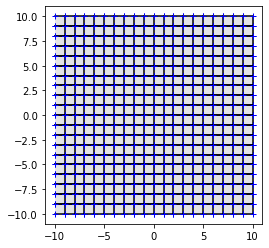

In [25]:

# Computes the four points of the square that composes a cell
def points_cell(x, y, d):    
    X = [x, x+d, x+d, x]
    Y = [y, y, y+d, y+d]
    return X, Y

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
# plot each cell
for x, y in zip(grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='0.9')
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    
fig.canvas.draw()

In [34]:
l0 = (0.3/(1-0.3))  # Initial belief
gmap = l0 * ones(n*n) # Initial belief
count=0
# For each cell, check if the circle is in it.
for i in range(n*n):
    count=0
    x, y = grid_x[i], grid_y[i]
    for values in xycord:
        # Corners of the cell
        X, Y = points_cell(x, y, cell_w)
        # check based on the ecuclidean distance
        dist = sqrt((values[0] - X)**2 + (values[1] - Y)**2)
    
        # Check if At least one of the borders is within the sphere
        if((dist < values[3]/values[2]).any()):
            print(dist)
            po = 0.8  # P(mi/zt) probability of having an obstacle 
            li = log(po / (1-po)) + gmap[i] - l0
            gmap[i] = li  # P(mi/zt) 
            print(li)
        else:
            po = 0.05  # P(mi/zt) probability of having an obstacle given a non-detected obstacle
            
            # Cells within the fov. Check if the four points are withing the FOV
            thetas = np.arctan2(Y,X) - pi/2
            if np.logical_and(-pi/6-values[4] <thetas, thetas < pi/6-values[4]).all():
                li = log(po / (1-po)) + gmap[i] - l0
                gmap[i] = li
            pass

# gmap

[1.86366032 1.52100144 0.52501602 1.19809273]
1.3862943611198908
[1.19809273 0.52501602 0.48768664 1.18221091]
1.3862943611198908
[1.18221091 0.48768664 1.48325139 1.83298092]
1.3862943611198908
[1.52100144 1.77585501 1.05634154 0.52501602]
1.3862943611198908
[0.52501602 1.05634154 1.03829373 0.48768664]
1.3862943611198908
[0.48768664 1.03829373 1.74363136 1.48325139]
1.3862943611198908
[1.78678532 1.05456757 0.54841699 1.54313001]
-5.359726454355847
[1.54313001 0.54841699 1.22041371 1.88941755]
-8.732736862093716
[1.43318783 1.21362298 0.2864389  0.81436716]
1.3862943611198908
[0.81436716 0.2864389  0.83139266 1.12798953]
1.3862943611198908
[1.05456757 1.01568879 0.46933162 0.54841699]
-5.359726454355847
[0.54841699 0.46933162 1.18697962 1.22041371]
-8.732736862093716
[1.21362298 1.70050996 1.22511249 0.2864389 ]
1.3862943611198908
[0.2864389  1.22511249 1.45260701 0.83139266]
1.3862943611198908
[1.01568879 1.7178867  1.46279976 0.46933162]
-5.359726454355847
[0.46933162 1.46279976 1.

In [35]:
print(gmap)

[  0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
   0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
  -9.69045979 -13.0634702  -13.0634702   -9.69045979 -13.0634702
 -13.0634702  -16.43648061 -13.0634702  -16.43648061 -16.43648061
   0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
   0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
  -9.69045979 -13.0634702  -13.0634702  -13.0634702  -13.0634702
 -16.43648061 -16.43648061 -16.43648061 -16.43648061 -16.43648061
   0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
   1.38629436   1.38629436   1.38629436   0.42857143   0.42857143
  -6.31744939 -13.0634702   -9.69045979 -13.0634702  -13.0634702
 -16.43648061 -16.43648061 -16.43648061 -16.43648061 -16.43648061
   0.42857143   0.42857143   0.42857143   0.42857143   0.42857143
   1.38629436   1.38629436   1.38629436   0.42857143   0.42857143
  -5.35972645 -12.10574727  -9.69045979 -13.0634702  -16.43648061
 -16.43648061

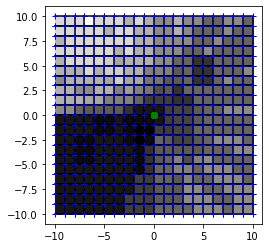

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

# normalize gmap
gmap = gmap - min(gmap)
gmap = gmap / max(gmap)

# plot each cell
for c, x, y in zip(gmap, grid_x, grid_y):
    X, Y = points_cell(x, y, cell_w)
    cell = plt.Polygon([(xi, yi) for xi, yi in zip(X,Y)], color='%f'%(1-c))
    
    ax.add_patch(cell)

    plot(X,Y, 'k-')
    plot(X,Y, 'b+')    
    plot(0,0, 'go')
    
fig.canvas.draw()

<class 'float'>
